###Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Load Dataset

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1 - Data Preprocessing

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


###Exploratory Data Analysis

In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




*   First, check which data is present in the "Embarked" column. Remove the null values (as there are only a few). Next, convert the categorical data into numerical form.



In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df = df.dropna(subset=['embarked'])
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df['embarked'] = df['embarked'].map(
    {
        'S': 0,
        'C': 1,
        'Q': 2
    }
    )
df['embarked'].unique()

array([0, 1, 2])

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['sex'] = df['sex'].map(
    {
        'male': 0,
        'female': 1
    }
    )
df['sex'].unique()

array([0, 1])

In [ ]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df['who'] = df['who'].map(
    {
        'man': 0,
        'woman': 1,
        'child': 2
    }
    )
df['who'].unique()

array([0, 1, 2])

In [ ]:
df['alive'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['alive'] = df['alive'].map(
    {
        'no': 0,
        'yes': 1
    }
    )
df['alive'].unique()

array([0, 1])



Check what values are present in the "Age" column in order to decide how to handle the null data.

 Analysis:

*  Since we have a large amount of null data, we cannot remove it, as doing so would result in data loss.

Solution:

*   We should fill the null values with the mean of the column.





In [ ]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
df['age'].isnull()

,age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,0,True,NaN,Southampton,0,False
1,1,1,1,38.0,1,0,71.2833,1,First,1,False,C,Cherbourg,1,False
2,1,3,1,26.0,0,0,7.9250,0,Third,1,False,NaN,Southampton,1,True
3,1,1,1,35.0,1,0,53.1000,0,First,1,False,C,Southampton,1,False
4,0,3,0,35.0,0,0,8.0500,0,Third,0,True,NaN,Southampton,0,True


In [ ]:
new_df = df[['pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked', 'survived']]
new_df

,pclass,sex,age,sibsp,fare,embarked,survived
0,3,0,22.000000,1,7.2500,0,0
1,1,1,38.000000,1,71.2833,1,1
2,3,1,26.000000,0,7.9250,0,1
3,1,1,35.000000,1,53.1000,0,1
4,3,0,35.000000,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,13.0000,0,0
887,1,1,19.000000,0,30.0000,0,1
888,3,1,29.642093,1,23.4500,0,0
889,1,0,26.000000,0,30.0000,1,1




*   Find correlation



In [ ]:
cor = new_df.corr()
cor

,pclass,sex,age,sibsp,fare,embarked,survived
pclass,1.000000,-0.127741,-0.328256,0.081656,-0.548193,0.043835,-0.335549
sex,-0.127741,1.000000,-0.089339,0.116348,0.179958,0.118593,0.541585
age,-0.328256,-0.089339,1.000000,-0.231908,0.088780,0.008940,-0.074513
sibsp,0.081656,0.116348,-0.231908,1.000000,0.160887,-0.060606,-0.034040
fare,-0.548193,0.179958,0.088780,0.160887,1.000000,0.063462,0.255290
embarked,0.043835,0.118593,0.008940,-0.060606,0.063462,1.000000,0.108669
survived,-0.335549,0.541585,-0.074513,-0.034040,0.255290,0.108669,1.000000


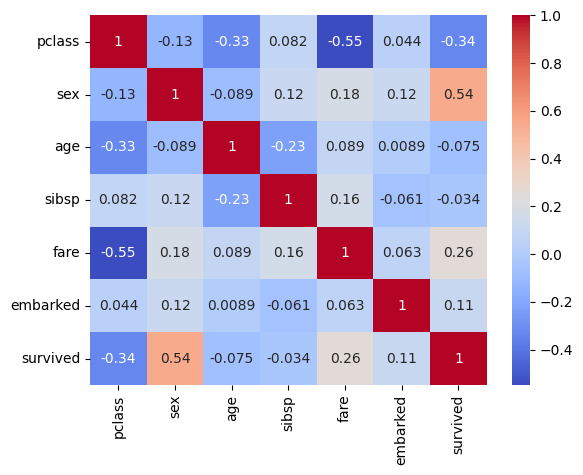

In [ ]:
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()



*   Survival analysis based on different factors



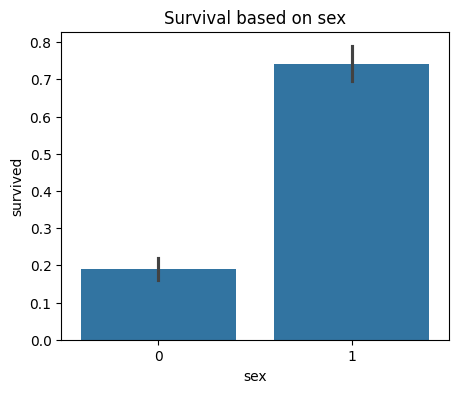

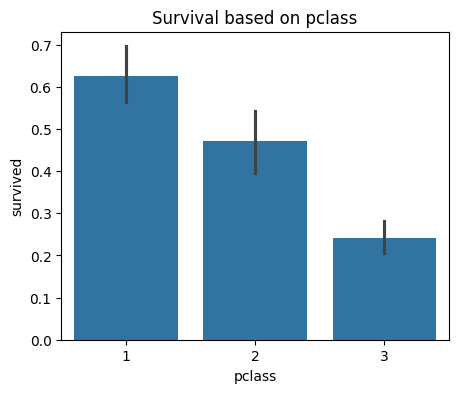

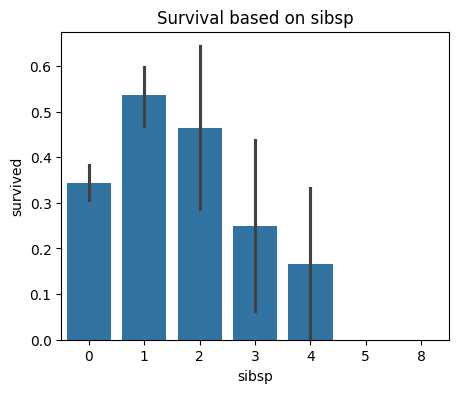

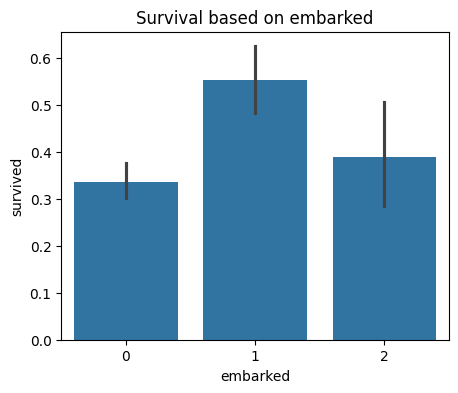

In [ ]:
for i in new_df[['sex','pclass','sibsp','embarked']]:
    plt.figure(figsize=(5,4))
    sns.barplot(x=new_df[i],y=new_df['survived'])
    plt.title('Survival based on ' + str(i))
    plt.show()



By the above visualizations, we conclude that:

Most of the survival includes:

*   women (priority given to women).
*   1st class passengers (Higher socio-economic status = better access to lifeboats).

*   Very high Sibling/Spouse values (≥3) → survival dropped.
*   Small family groups were prioritized, large groups struggled.













### 2 - Separate Feature and Target column

In [ ]:
x = new_df.iloc[:,0:6]
y = new_df.iloc[:,-1]

In [ ]:
x

,pclass,sex,age,sibsp,fare,embarked
0,3,0,22.000000,1,7.2500,0
1,1,1,38.000000,1,71.2833,1
2,3,1,26.000000,0,7.9250,0
3,1,1,35.000000,1,53.1000,0
4,3,0,35.000000,0,8.0500,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,13.0000,0
887,1,1,19.000000,0,30.0000,0
888,3,1,29.642093,1,23.4500,0
889,1,0,26.000000,0,30.0000,1


In [ ]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### 3 - Split Data into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

### 4 - Create and Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()

In [ ]:
lgr.fit(x_train, y_train) # Model training

LogisticRegression()

In [ ]:
x_test

,pclass,sex,age,sibsp,fare,embarked
281,3,0,28.0,0,7.8542,0
435,1,1,14.0,1,120.0000,0
39,3,1,14.0,1,11.2417,1
418,2,0,30.0,0,13.0000,0
585,1,1,18.0,0,79.6500,0
...,...,...,...,...,...,...
433,3,0,17.0,0,7.1250,0
807,3,1,18.0,0,7.7750,0
25,3,1,38.0,1,31.3875,0
85,3,1,33.0,3,15.8500,0


In [ ]:
y_test

,survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


### 5 - Predict on Training and Testing Data

In [ ]:
y_predicted_train = lgr.predict(x_train)
y_predicted_test = lgr.predict(x_test)

In [ ]:
trainingScore = accuracy_score(y_train,y_predicted_train)
testingScore = accuracy_score(y_test,y_predicted_test)

In [ ]:
print("Training Accuracy : ", trainingScore)
print("Testing Accuracy : ", testingScore)

Training Accuracy :  0.7974683544303798
Testing Accuracy :  0.7865168539325843


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_predicted_test))
conf_matrix = confusion_matrix(y_test, y_predicted_test)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Confusion Matrix:
 [[87 22]
 [16 53]]


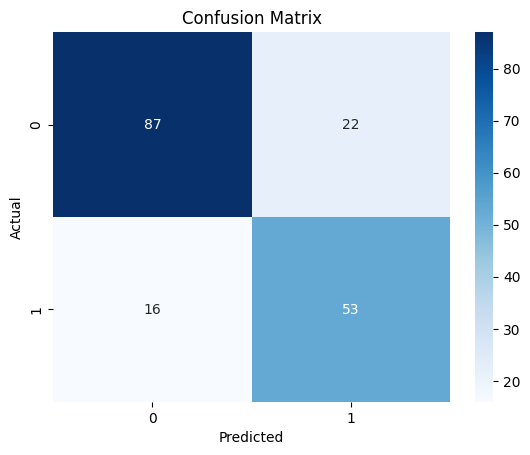

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

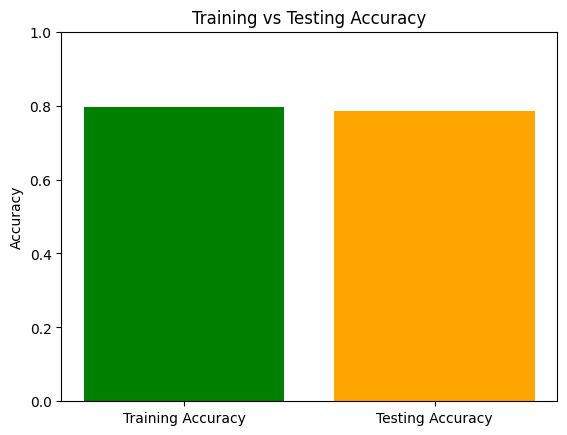

In [ ]:
plt.bar(['Training Accuracy', 'Testing Accuracy'], [trainingScore, testingScore], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()